# Aprendizado Profundo - UFMG

## Preâmbulo

O código abaixo consiste dos imports comuns. Além do mais, configuramos as imagens para ficar de um tamanho aceitável e criamos algumas funções auxiliares. No geral, você pode ignorar a próxima célula.

In [ ]:
# -*- coding: utf8

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [ ]:
plt.ion()

plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

## Aula 01 - Programação Diferenciável e Tensores

Quando pensamos no lado prático do aprendizado profundo, um aspecto chave que ajuda na implementação de novos algoritmos é a chamada programação diferenciável. Na próxima aula vamos voltar na mesma. No momento, o importante é salientar que a programação diferenciável faz uso extensivo de Tensores. Um [Tensor](http://en.wikipedia.org/wiki/Tensor) é uma generalização de matrizes para mais dimensões. Quando falamos de tensores, temos três casos especiais e um genérico que engloba os outros três:

1. **Escalar:** Um tensor de zero dimensões

In [ ]:
1

1

1. **Vetor:** Um tensor de uma dimensão

In [ ]:
np.array([1, 2])

array([1, 2])

1. **Matrizes:** Um tensor de duas dimensões

In [ ]:
np.array([[1, 2], [2, 2]])

array([[1, 2],
       [2, 2]])

1. **Tensores**. Caso geral, representam n-dimensões. Na figura temos um tensor 3x3x3.

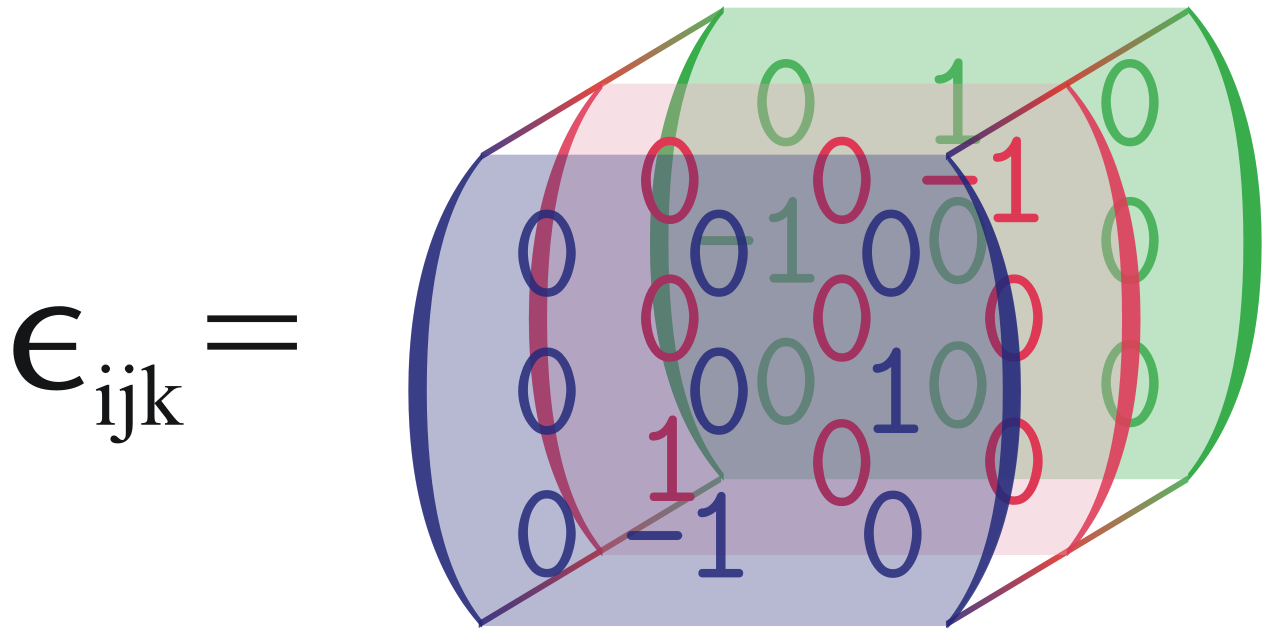
# ![](./figs/tensor.png)

No exemplo abaixo, temos um tensor 3x2x2. Note ao selecionar elementos da primeira dimensão ficamos com matrizes 2x2. 

In [ ]:
X = np.random.randn(3, 2, 2) # Gera números aleatórios de uma normal
print(X)

[[[-0.63215934 -0.61053933]
  [-0.47382421  0.43300276]]

 [[ 0.03645628 -1.17129967]
  [ 1.34848862 -0.58125166]]

 [[-1.98553531  1.20535988]
  [ 0.20009548  0.56325774]]]


In [ ]:
print(X[0])

[[-0.63215934 -0.61053933]
 [-0.47382421  0.43300276]]


In [ ]:
X[1]

array([[ 0.03645628, -1.17129967],
       [ 1.34848862, -0.58125166]])

In [ ]:
X[2]

array([[-1.98553531,  1.20535988],
       [ 0.20009548,  0.56325774]])

## Indexando

Sendo X uma matriz:

In [ ]:
X = np.array([[1, 2], [2, 2]])
X

array([[1, 2],
       [2, 2]])

`X[l]` pega uma linha

In [ ]:
X[0]

array([1, 2])

`X[:, c]` pega uma coluna

In [ ]:
X[:, 1]

array([2, 2])

`X[um_vetor]` pega as linhas do vetor. `X[:, um_vetor]` pega as colunas

In [ ]:
X = np.array([[1, 2, 3], [2, 2, 2]])
print(X)
print(X[:, [1, 2]])

[[1 2 3]
 [2 2 2]]
[[2 3]
 [2 2]]


`X[vetor_booleano]` Retorna as linhas (ou colunas quando `X[:, vetor_booleano]`) onde o vetor é true

In [ ]:
X[[True, False]]

array([[1, 2, 3]])

In [ ]:
X[:, [True, False, True]]

array([[1, 3],
       [2, 2]])

## Shape, Reshape e Ravel

Todo vetor, matriz e tensor pode ser redimensionado. Observe como no tensor abaixo temos `3x2x2=12` elementos. Podemos redimensionar os mesmos para outros arrays de tamanho 12.

In [ ]:
X = np.random.randn(3, 2, 2)
X.shape

(3, 2, 2)

Como matriz

In [ ]:
X.reshape((2, 6))

array([[ 0.71562184, -0.52671825,  0.14637984, -0.51064107, -0.71285246,
        -1.16808983],
       [ 0.51949826, -0.50284676, -0.8902842 , -0.01797443,  0.94788187,
         0.49702382]])

Outra Matriz

In [ ]:
X.reshape((6, 2))

array([[ 0.71562184, -0.52671825],
       [ 0.14637984, -0.51064107],
       [-0.71285246, -1.16808983],
       [ 0.51949826, -0.50284676],
       [-0.8902842 , -0.01797443],
       [ 0.94788187,  0.49702382]])

In [ ]:
X.reshape((6, -1))

array([[ 0.71562184, -0.52671825],
       [ 0.14637984, -0.51064107],
       [-0.71285246, -1.16808983],
       [ 0.51949826, -0.50284676],
       [-0.8902842 , -0.01797443],
       [ 0.94788187,  0.49702382]])

Um Tensor

In [ ]:
X.reshape((6, 2, 1))

array([[[ 0.71562184],
        [-0.52671825]],

       [[ 0.14637984],
        [-0.51064107]],

       [[-0.71285246],
        [-1.16808983]],

       [[ 0.51949826],
        [-0.50284676]],

       [[-0.8902842 ],
        [-0.01797443]],

       [[ 0.94788187],
        [ 0.49702382]]])

As operações flatten e ravel organizam os elementos como um vetor.

In [ ]:
X.flatten()

array([ 0.71562184, -0.52671825,  0.14637984, -0.51064107, -0.71285246,
       -1.16808983,  0.51949826, -0.50284676, -0.8902842 , -0.01797443,
        0.94788187,  0.49702382])

In [ ]:
X.ravel()

array([ 0.71562184, -0.52671825,  0.14637984, -0.51064107, -0.71285246,
       -1.16808983,  0.51949826, -0.50284676, -0.8902842 , -0.01797443,
        0.94788187,  0.49702382])